# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [10]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# read data
df = pd.read_csv('product_sales.csv')
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


## Data Validation and Cleaning

- Check for missing values and duplicates
- Handle missing values by either removing the rows or filling them with appropriate values
- Identify duplicates and decide whether to remove them or keep them
- Check for data types and convert them if necessary
- Check for outliers and decide whether to remove them or keep them

### Columns
**Week** (int): Week number (1-52) <br>
**sales_method** (categorical): Sales method (Email, Call, Email + Call) <br>
**customer_id** (string): Unique identifier for each customer <br>
**nb_sold** (int): Number of products sold <br>
**revenue** (float): Revenue generated from sales <br>
**years_as_customer** (int): Number of years the customer has been a customer <br>
**nb_site_visits** (int): Number of site visits made by the customer <br>
**state** (categorical): State of the customer (New York, California, Texas, etc.)


In [12]:
print('Total number of rows:', df.shape[0]) 
print(df.info())

Total number of rows: 15000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB
None


Categorical columns: ['sales_method', 'state']


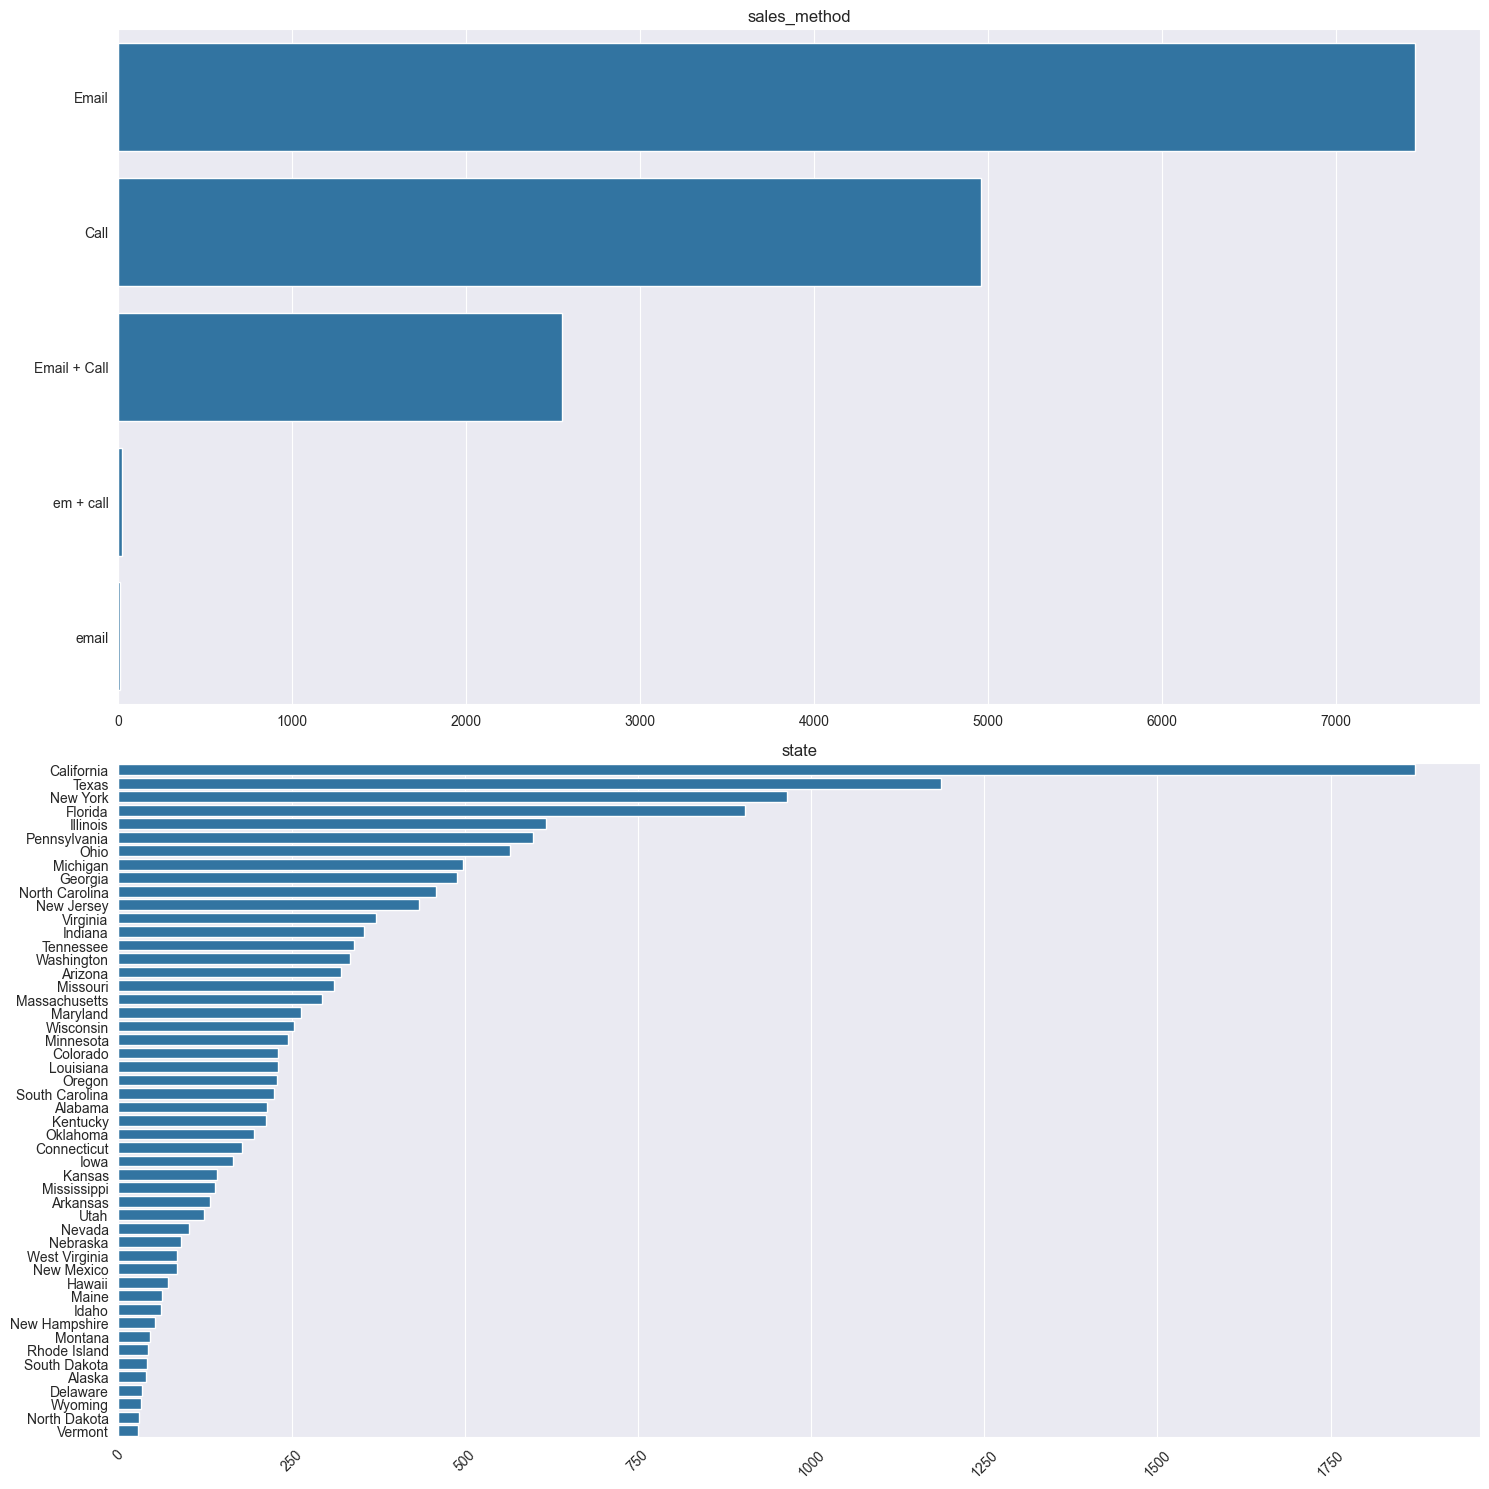

In [13]:
# print categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('customer_id')
print('Categorical columns:', cat_cols)

fig, axs = plt.subplots(len(cat_cols), figsize=(15,15))

# Iterate over the categorical columns and plot countplots
for i, col in enumerate(cat_cols):
    sns.countplot(y=col, data=df, ax=axs[i], order = df[col].value_counts().index)
    axs[i].set_title(col)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    plt.xticks(rotation=45)
    plt.tight_layout()


In [14]:
# dropping columns where revenue is missing
df.dropna(subset=['revenue'], inplace=True)
df.isnull().sum()

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

In [15]:
# create a function that cleans the categorical columns
def clean_categorical(df, col):
    df['sales_method'] = df['sales_method'].replace({'email': 'Email', 'em + call': 'Email + Call'})
    return df
print(df['sales_method'].value_counts())
df = clean_categorical(df, 'sales_method')
print('\n After cleaning sales_method:', df['sales_method'].value_counts())


sales_method
Email           6915
Call            4781
Email + Call    2203
em + call         20
email              7
Name: count, dtype: int64

 After cleaning sales_method: sales_method
Email           6922
Call            4781
Email + Call    2223
Name: count, dtype: int64


# Checking the Numerical Variables

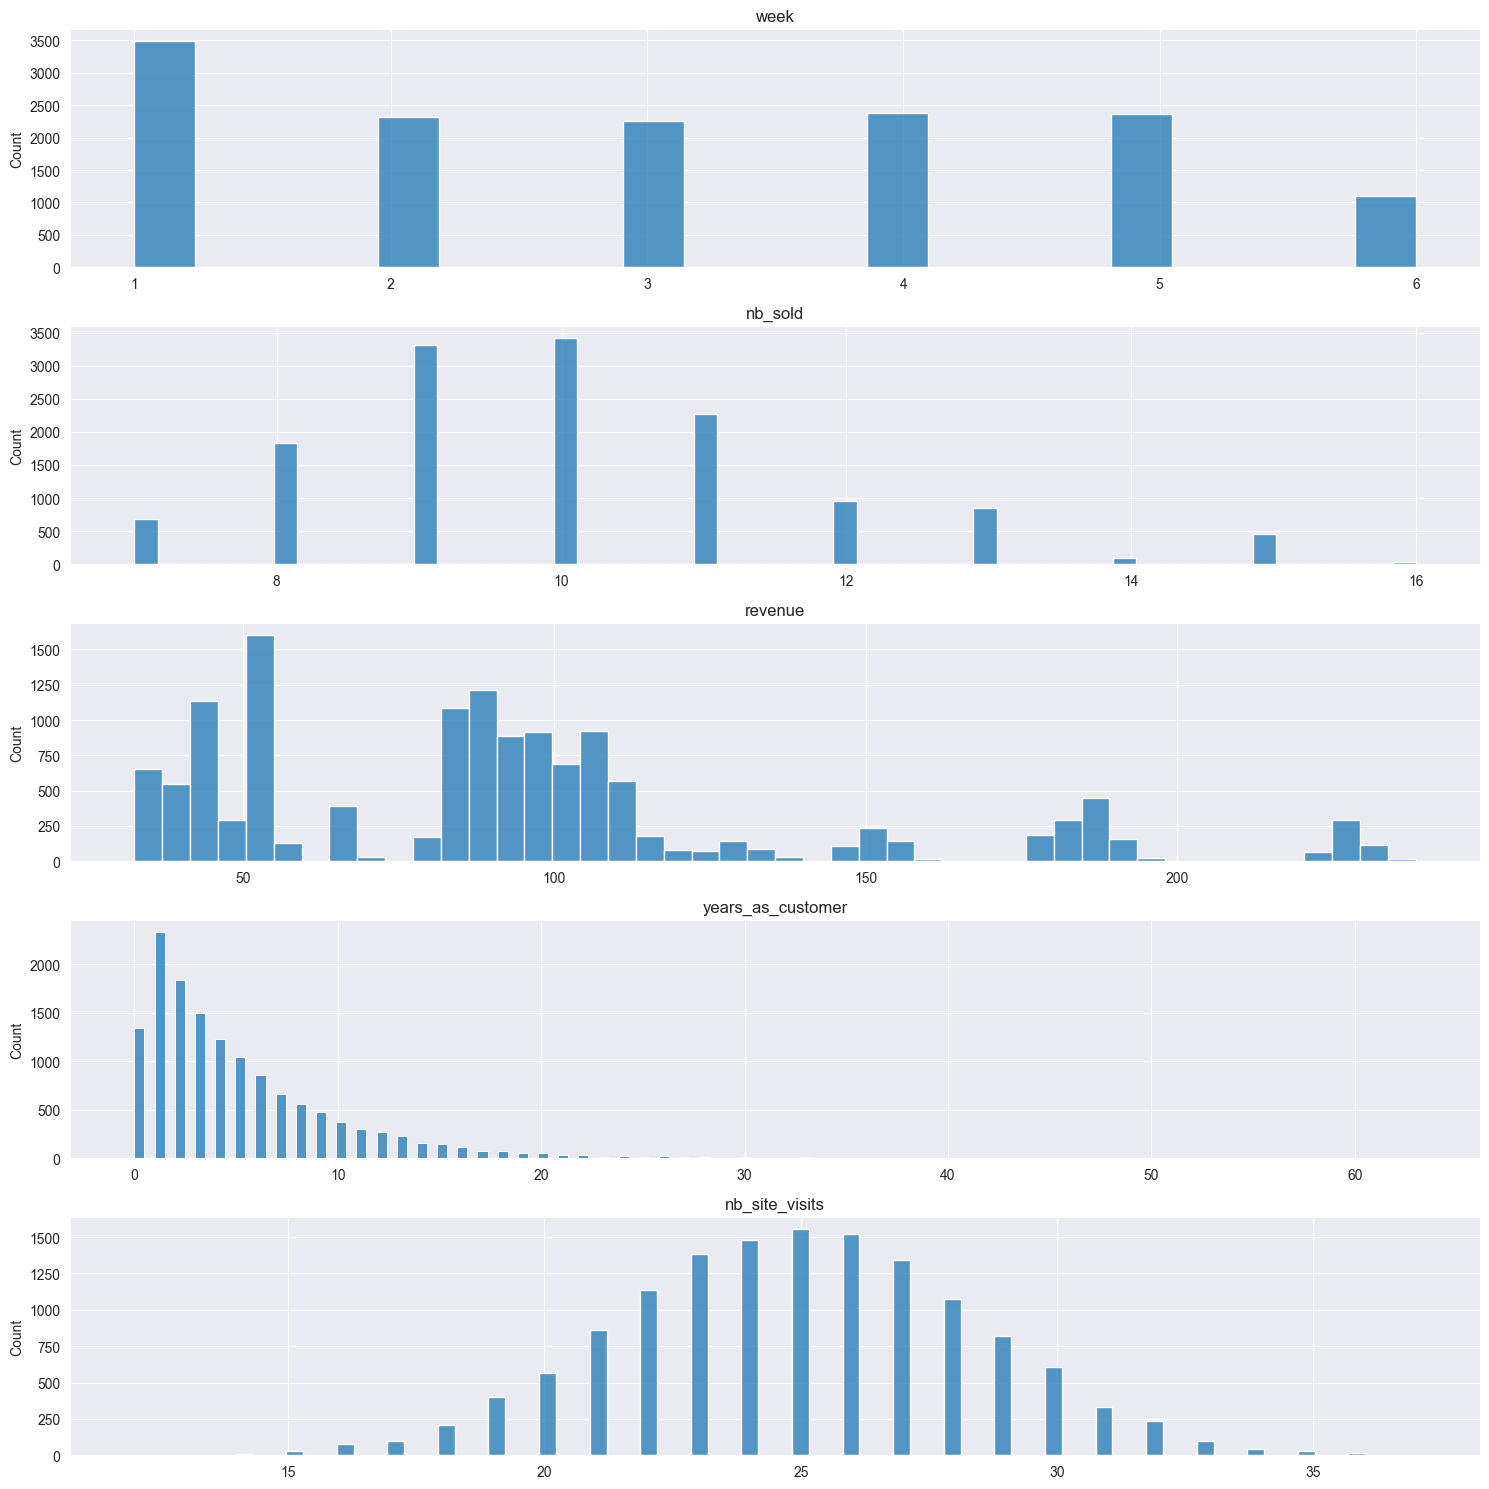

In [20]:
# plot the numerical
num_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()
fig, axs = plt.subplots(len(num_cols), figsize=(15,15))

# Iterate over the numerical columns and plot histograms
for i, col in enumerate(num_cols):
    sns.histplot(df[col], ax=axs[i])
    axs[i].set_title(col)
    axs[i].set_xlabel('')
    plt.tight_layout()

In [21]:
def clean_numerical(df):
    # revenue rounded to two decimal places
    df['revenue'] = df['revenue'].round(2)
    # nb_sold rounded to the nearest whole number
    df['nb_sold'] = df['nb_sold'].round()
    # years_as_customer should be positive and whole number
    df['years_as_customer'] = df['years_as_customer'].abs().astype(int)
    # nb_site_visits should be positive and whole number
    df['nb_site_visits'] = df['nb_site_visits'].abs().astype(int)
    return df

df = clean_numerical(df)
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,13926.000000,13926.000000,13926.000000,13926.000000,13926.000000
mean,3.078271,10.040069,93.934943,4.978960,24.947006
std,1.650650,1.789690,47.435312,5.047828,3.491491
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,1.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,4.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,37.000000


## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation